# **Student Feedback Survey Analysis**

This notebook will walk you through the whole data cleaning, data analysis and insights discovery process of this workflow on a step-by-step basis. The steps are as follows:

1. Installation of Libraries.
2. Loading the data from file.
3. Cleaning and Transforming the data.
4. Exploratory Data Analysis (EDA).
5. Insights and Recommendations.
6. Export of cleaned data

**1. Installation of Libraries**

- The libraries needed for the analysis of the survey data are installed.

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud textblob vadersentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.7 MB/s eta 0:00:00


- The Natural Language Toolkit (NLTK) Library is downloaded and imported.

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


**2. Loading the data from file**
- Since the file containing the data to be analyzed is located in Google Drive, we first mount the drive and specify the path to the file in order to locate it.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/student_feedback.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


**3. Cleaning and Transforming the data**
- First we check to see if any null values are present in the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

No null values in data so we proceed to import the 'numpy' library and perform the following operations:

- Normalize column names
- Rename column names to common schema
- Coerce numeric parameters
- Sort missing numeric parameters
- Cleaning duplicates

In [4]:
import numpy as np

df = df.copy(deep=True)

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace('[^a-z0-9]+','_', regex=True)

# Rename to common schema
rename_map = {
    'unnamed_0': 'row',
    'student_id': 'student_id',
    'well_versed_with_the_subject': 'well_versed_with_the_subject',
    'explains_concepts_in_an_understandable_way': 'explains_concepts_in_an_understandable_way',
    'use_of_presentations': 'use_of_presentations',
    'degree_of_difficulty_of_assignments': 'degree_of_difficulty_of_assignments',
    'solves_doubts_willingly': 'solves_doubts_willingly',
    'structuring_of_the_course': 'structuring_of_the_course',
    'provides_support_for_students_going_above_and_beyond': 'provides_support_for_students_going_above_and_beyond',
    'course_recommendation_based_on_relevance': 'course_recommendation_based_on_relevance',
}
df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})

# Coerce numeric values
for col in ['well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way', 'use_of_presentations', 'degree_of_difficulty_of_assignments', 'solves_doubts_willingly', 'structuring_of_the_course', 'provides_support_for_students_going_above_and_beyond', 'course_recommendation_based_on_relevance']:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort missing numerical parameters
if ('well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way', 'use_of_presentations', 'degree_of_difficulty_of_assignments', 'solves_doubts_willingly', 'structuring_of_the_course', 'provides_support_for_students_going_above_and_beyond', 'course_recommendation_based_on_relevance') in df.columns:
    df = df[df['well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way', 'use_of_presentations', 'degree_of_difficulty_of_assignments', 'solves_doubts_willingly', 'structuring_of_the_course', 'provides_support_for_students_going_above_and_beyond', 'course_recommendation_based_on_relevance'].between(1,10)]

#Cleaning duplicates
df = df.drop_duplicates()

print(df.shape)
df.head()


(1001, 10)


,row,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


**4. Exploratory Data Analysis (EDA)**

In this section, we first of all created bin labels to group the numerical ratings into 3 categories: 'Fair', 'Good' and 'Great' for easy reference. After this was done, we then proceeded to uncover the following insights:

- Knowledge level rating per student feedback.
- Presentation rating per student feedback.
- Concepts explanation per student feedback.
- Assignment difficulty per student feedback.
- Doubt resolution per student feedback.
- Course structure per student feedback.
- Student support per student feedback.
- Course recommendation per student feedback.

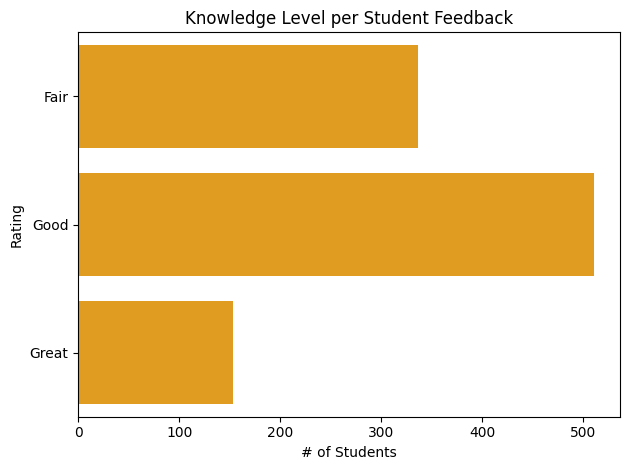

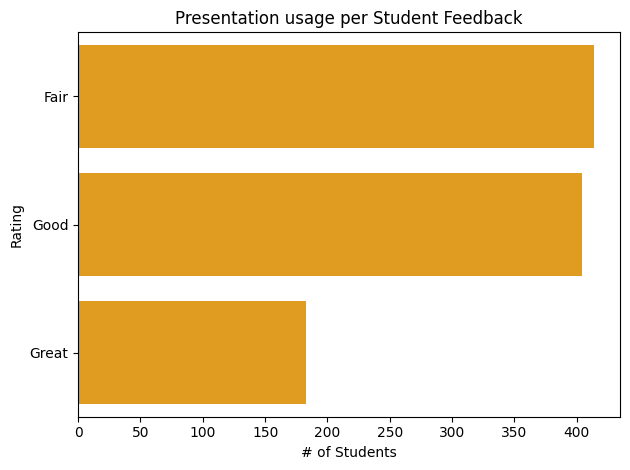

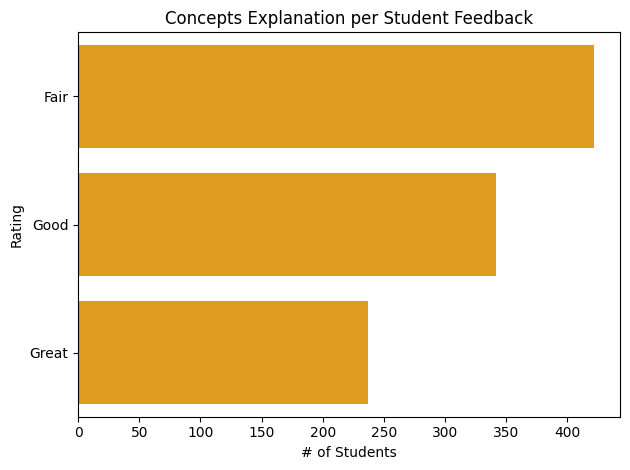

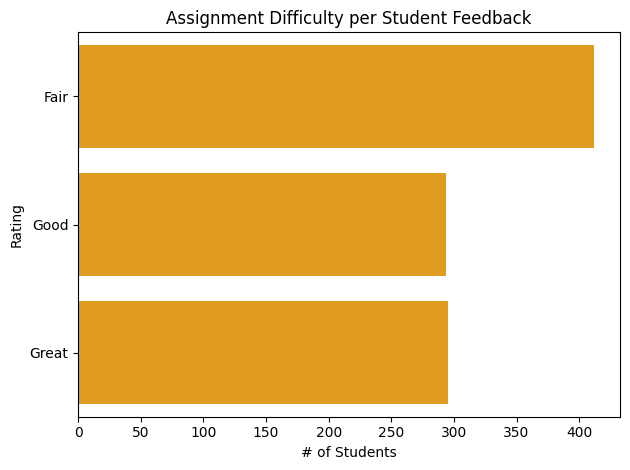

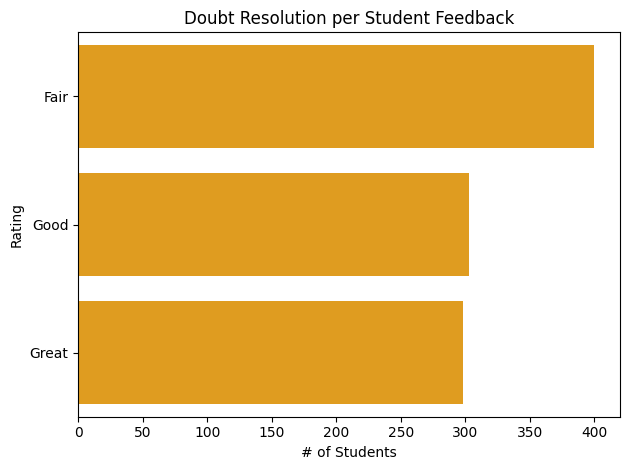

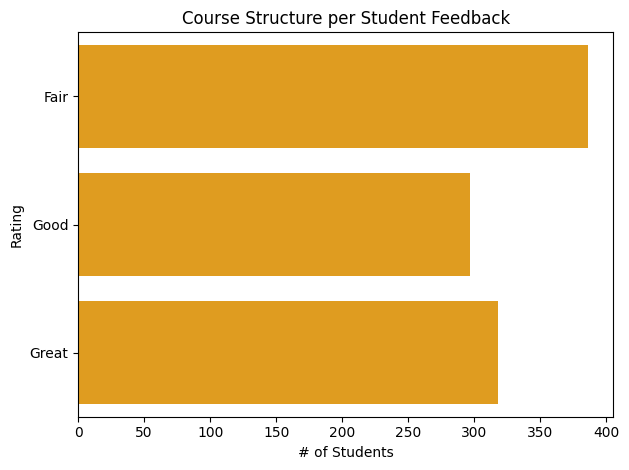

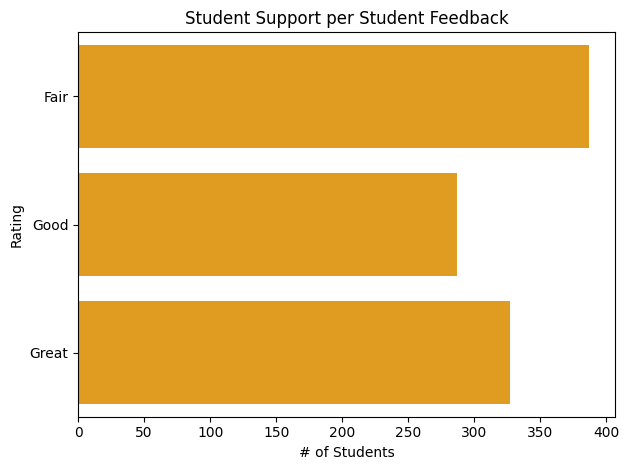

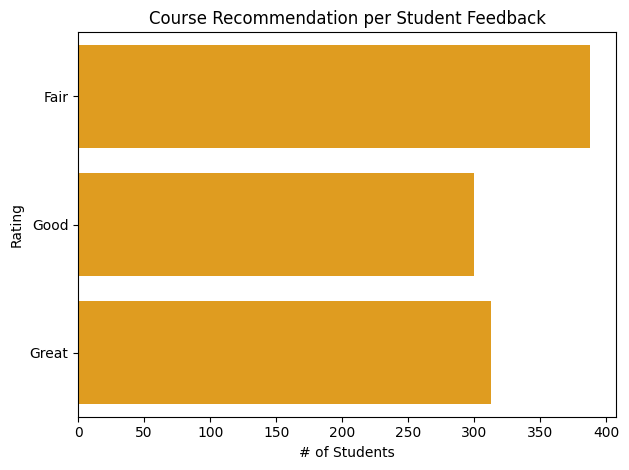

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creation of Bin Labels for rating categories
bin_labels = ['Fair', 'Good', 'Great']

#Knowledge level rating per student feedback
well_versed_with_the_subject_group = pd.qcut(df.well_versed_with_the_subject,labels=bin_labels,q=3)
ax = sns.countplot(well_versed_with_the_subject_group, color='orange')
ax.set_title('Knowledge Level per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Presentation rating per student feedback
use_of_presentations_group = pd.qcut(df.use_of_presentations,labels=bin_labels,q=3)
ax = sns.countplot(use_of_presentations_group, color='orange')
ax.set_title('Presentation usage per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Rating for explanation of concepts per student feedback
explains_concepts_in_an_understandable_way_group = pd.qcut(df.explains_concepts_in_an_understandable_way,labels=bin_labels,q=3)
ax = sns.countplot(explains_concepts_in_an_understandable_way_group, color='orange')
ax.set_title('Concepts Explanation per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Assignment difficulty rating per student feedback
degree_of_difficulty_of_assignments_group = pd.qcut(df.degree_of_difficulty_of_assignments,labels=bin_labels,q=3)
ax = sns.countplot(degree_of_difficulty_of_assignments_group, color='orange')
ax.set_title('Assignment Difficulty per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Doubt resolution rating per student feedback
solves_doubts_willingly_group = pd.qcut(df.solves_doubts_willingly,labels=bin_labels,q=3)
ax = sns.countplot(solves_doubts_willingly_group, color='orange')
ax.set_title('Doubt Resolution per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Course Structure rating per student feedback
structuring_of_the_course_group = pd.qcut(df.structuring_of_the_course,labels=bin_labels,q=3)
ax = sns.countplot(structuring_of_the_course_group, color='orange')
ax.set_title('Course Structure per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Student Support rating per student feedback
provides_support_for_students_going_above_and_beyond_group = pd.qcut(df.provides_support_for_students_going_above_and_beyond,labels=bin_labels,q=3)
ax = sns.countplot(provides_support_for_students_going_above_and_beyond_group, color='orange')
ax.set_title('Student Support per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

#Course recommendation rating per student feedback
course_recommendation_based_on_relevance_group = pd.qcut(df.course_recommendation_based_on_relevance,labels=bin_labels,q=3)
ax = sns.countplot(course_recommendation_based_on_relevance_group, color='orange')
ax.set_title('Course Recommendation per Student Feedback')
ax.set_xlabel('# of Students')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()



**5. Insights and Recommendations**

From the analysis carried out above, we can uncover a few things:
- The teacher has a good knowledge of the subject matter but the course could be structured in a better manner.
- The teacher's presentation techniques, when explaining course concepts to students, could be better.
- The teacher could also take time to explain course concepts to students to facilitate their understanding.
- The teacher could incorporate harder assignments to students as a way to assess their learning curve and reinforce understanding.
- The teacher takes time to understand and clarify doubts students have about course concepts but there's always room for improvement.
- Student support by the teacher is generally fair so there is room for improvement.

Overall, the teacher is doing okay but there is plenty of room for improvement on teaching performance.

**6. Export of clean data**

The final step would be to export the cleaned data and features in .csv format

In [9]:
out_csv = "student_feedback_survey_cleaned.csv"
df.to_csv(out_csv, index=False)
print(f"Saved: {out_csv}")

Saved: student_feedback_survey_cleaned.csv
